# **Modern Theory of Detection and Estimation**
## **Lab 3. Linear filtering for active noise cancellation and adaptive filtering**
### **Academic Year 2023/2024**

Bachelor's Degree in:
*   Mobile and Space Communications Engineering (groups 61 and 65)
*   Sound and Image Engineering (groups 66 and 69)
*   Telecommunication Technologies Engineering (groups 91, 92 and 95)
*   Telematics Engineering (groups 71 and 79)

Signal Theory and Communications Department


## **Students information**

**Surname(s) and name(s):** Pablo Fernández Martín

**Group:** 91

**Date:** 14/12/23

## **Logistics**

**Due Date**:

This assignment **is due by 11:59 pm** on **January 2, 2024**.



**Setup Instructions:**

Open Google Colab and upload the notebook ("TMDE_Lab3_student.ipynb"). You will find it at Aula Global (in the master group). Sometimes it will take a minute or so for a new Jupyter server to start up on your behalf. Once it does, you are ready to start!

In the notebook you will see clearly where you need to add code for your programming homework or to write an answer to a question.


**Submitting the solution for the Jupyter Notebook**

For Notebook submission, a student of the group will be uploading a copy of the Notebook file through Aula Global. He/she may submit as many times as he/she likes before the submission deadline, and we will use the latest submission for grading.

**Late submission policy**

If a **submission is one day late**, the **final grade on it will reflect a 20% late submission reduction** (for all the members in the group). If a submission is **two days late**, the deduction will be **40% and so on.**

In [ ]:
from IPython.core.display import Image, display
from IPython.display import Audio
from scipy.io import wavfile


# **1. Noise cancellation**

## 1.1 Description of the active noise cancellation

In this lab assessment we will simulate a typical airplane cockpit working environment, in which a strong background noise is always present, complicating communications between the pilot and the crew or between the pilot and the passengers.

Let's assume there are two microphones:
1. The main mic which captures the pilot's voice as well as the cockpit environment noise.
2. A secondary mic which only captures the cockpit noise.

Let's also assume that the pilot's voice ($s[n]$) and the cockpit noise ($v[n]$) are incorrelated, but the noise in the pilot's mic ($v_1[n]$) and in the secondary mic ($v_2[n]$) are correlated.

The **basic idea underlying this assignment** is to **use a filter to eliminate the additive background noise**. In this scenario, the **input signal** to the filter is the **noise in the secondary mic** ($v_2[n]=x[n]$) and the **reference signal** (desired signal) is **the sum of the target signal** ($s[n]$) and **the interference $v_1[n]$ that is related to $v[n]$** (please, see the figure below for further details).

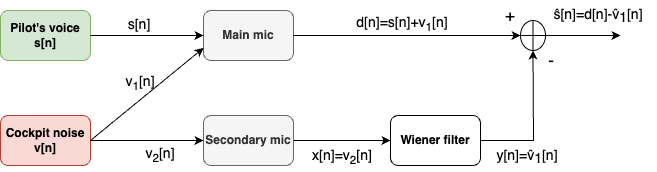

Since the input signal ($x[n]=v_2[n]$) is only correlated with the noise component of the reference signal ($v_1[n]$), the filter will be only able to create a good approximation of this noise component in the main mic ($y[n]= \widehat{v}_1[n]$). Therefore, the error signal of the filter will be an approximation to the pilot's voice.

## 1.2 Measure of performance

For a finite signal $x[n]$ with a duration of $N$ samples, the average instant power can be computed as follows:
$$
x[n] \longrightarrow P_x = \frac{1}{N}\sum_{i=1}^{N}{x^2[i]}
$$

If the signal $x[n]$ is the error signal, the average instant power can be seen as the mean square error (MSE).

In this assessment, in order to measure performance, we will compute the average instant power of the diference between the original signal and its reconstruction. As we will see later, this original signal will be the voice ($s[n]$) and the reconstructed signal will be the output of the system ($\widehat{s}[n]=d[n]-y[n]$).

## 1.3 Signals involved

### 1.3.1 Voice

The pilot's voice: To simplify the problem, we will use a single sinusoid (pure tone) lasting 2 seconds (more realistic signals, such as an actual voice clip, could also be used). Let's assume a sampling frequency of 8000 Hz and a frequency of 20 Hz.

In [2]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt


f = 20
fs = 8000
n = np.linspace(0, 2, 2 * fs)
A = 1
pilot = A * np.cos(2 * np.pi * f * n)

Plot the pilot's voice over time (in seconds). Indicate in the figure what both y-axis and x-axis represent.


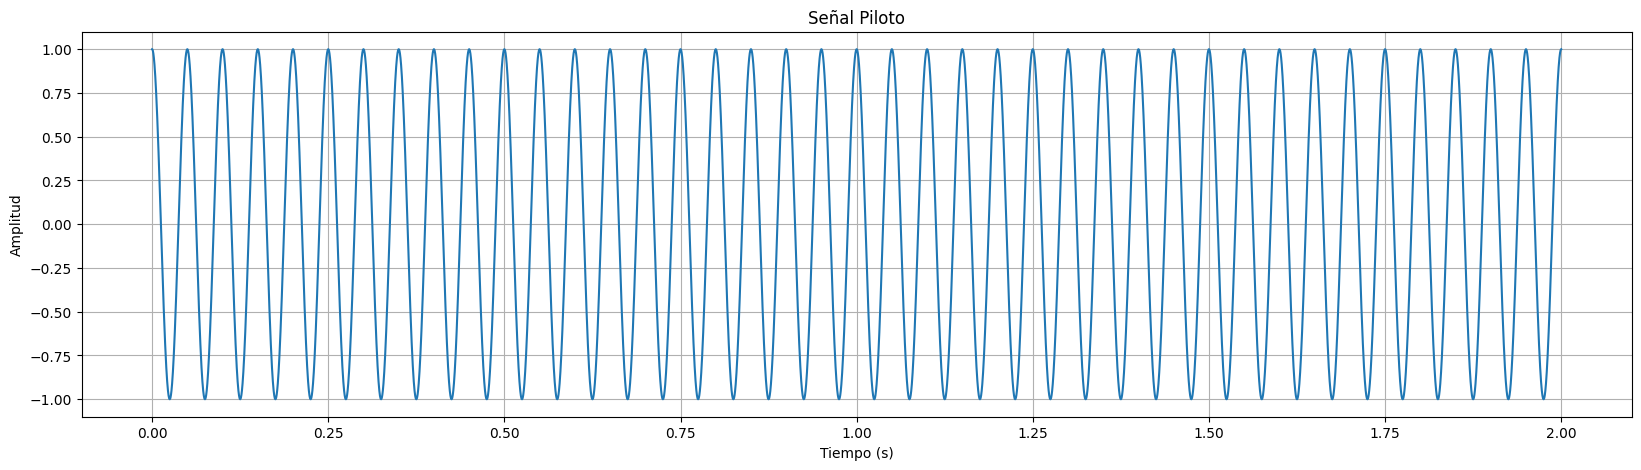

In [3]:
# YOUR CODE HERE
#<SOL>
plt.figure(figsize=(20,5))
plt.plot(n, pilot)
plt.title('Señal Piloto')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

#<\SOL>

### 1.3.2 Noise scenario #1

At this point we can consider **two different noise scenarios** for the assignment.

In particular, we will start by setting the cockpit noise to be random samples from the standard normal distribution (with the same duration $-$in seconds$-$ as the pilot's voice).

With this scenario in mind, the noise in both the pilot's microphone and the cockpit's microphone can be calculated as follows:

$$
v_{1}[n] = 2\cdot e^{-n / \sigma_{1}} * v[n]\\
v_{2}[n] = 2\cdot e^{-n / \sigma_{2}} * v[n]
$$
where:



*   $v[n]$ is a random normal signal representing the cockpit's background noise. To create this random noise, use the method `random.RandomState(n_clusters).rand` included in `NumPy`with the parameters `n_clusters` equal to $2$.
*   $n$ represents the time vector. Please note that it should be the same time vector as the one used to create the pilot's voice.
*   The exponential component represents each microphone's channel, with:
  *   $\sigma_1 = 0.05$ for the noise in the pilot's microphone ($v_1[n]$).
  *   $\sigma_2 = 0.0005$ for the cockpit microphone's noise ($v_2[n]$).


The pilot's microphone noise is also attenuated by a factor of 0.1.
Finally, the pilot's microphone noise must be added to the pilot's voice to obtain the main (pilot) mic's output signal.

Please note that the symbol $*$ denotes the convolution operation.

Plot, in the same figure, the two noise signals and the complete input in the pilot's microphone. Please, set a title to each plot or figure, indicating what each one represents.

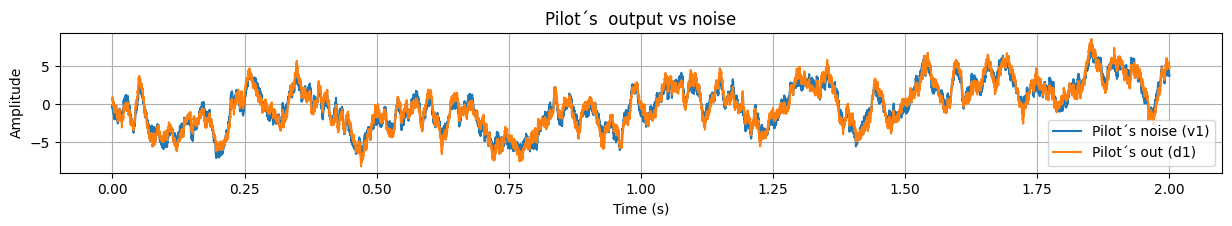

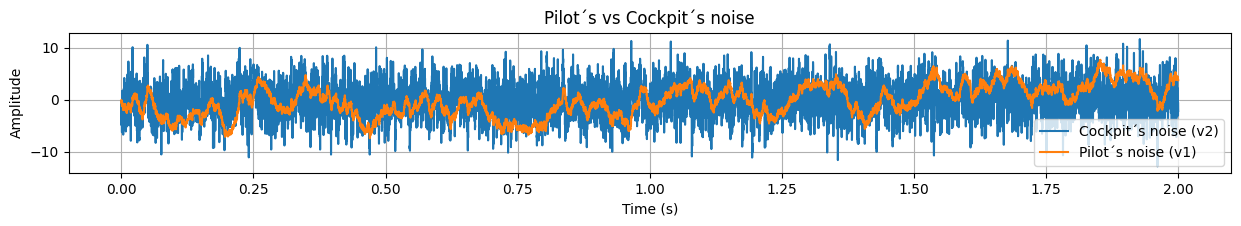

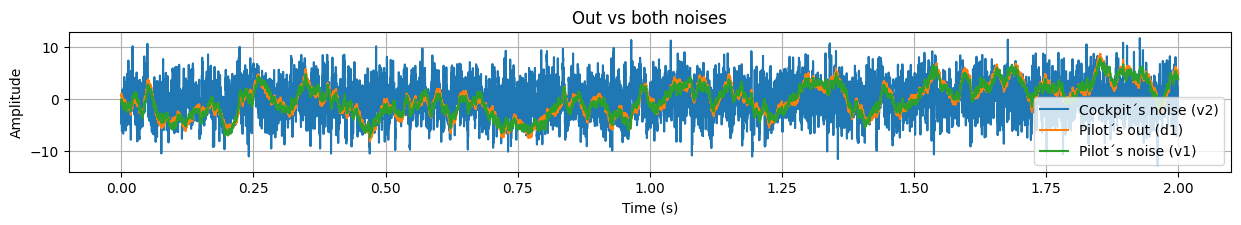

In [4]:
# YOUR CODE HERE
#<SOL>


n_clusters=2
v=np.random.RandomState(n_clusters).randn(len(pilot))
sig1=0.05
sig2=0.0005
v1=0.1*np.convolve(2*np.exp(-n/sig1),v)#pilot's noise
v1 = v1[:len(pilot)]

d1 = v1 + pilot #pilot's mic


v2=np.convolve(2*np.exp(-n/sig2),v)
v2=v2[:len(pilot)]#cockpit's mic


plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
plt.plot(n, v1, label='Pilot´s noise (v1)')
plt.plot(n, d1, label='Pilot´s out (d1)')
plt.title('Pilot´s  output vs noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(2,1,2)
plt.plot(n, v2, label='Cockpit´s noise (v2)')
plt.plot(n, v1, label='Pilot´s noise (v1)')


plt.title('Pilot´s vs Cockpit´s noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15,4))#Esta es la que se pide
plt.subplot(2,1,2)
plt.plot(n, v2, label='Cockpit´s noise (v2)')
plt.plot(n, d1, label='Pilot´s out (d1)')
plt.plot(n, v1, label='Pilot´s noise (v1)')


plt.title('Out vs both noises')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()





#<\SOL>

Having a look at the two noise recordings, what is the effect of the variance on the noise in each microphone?

<font color = 'green'> YOUR ANSWER HERE

Cuanto mayor sea la varianza, más se diferenciará del valor promedio. Si no atenuáramos el ruido del piloto (v1), podríamos ver que no se mantiene tan cerca de 0 (el valor esperado) como el ruido de la cabina (v2).

### 1.3.3 Noise scenario #2

In this scenario, the noise in the pilot's microphone will be defined as follows:

$$
v_1[n] = 2\cdot v[n]
$$

and the noise in the cockpit's microphone is obtained as shown below:
$$
v_2[n] = \sin\Bigg(\frac{1}{1+\exp^{- 2\cdot v[n]}}\Bigg)
$$

where $v[n]$ is the random normal signal representing the cockpit's background noise. Please, create this random noise using the method `random.RandomState(n_clusters).rand` included in `NumPy` with the parameters `n_clusters` equal to $2$.

Plot, in the same figure, the two noise signals and the complete input in the pilot's microphone. Please, set a title to each plot or figure, indicating what each one represents.

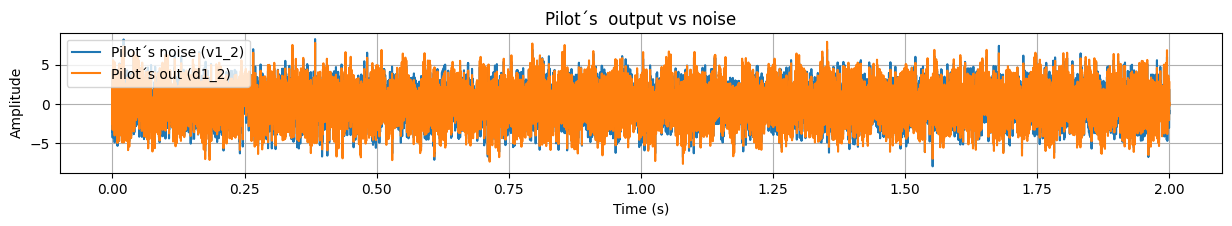

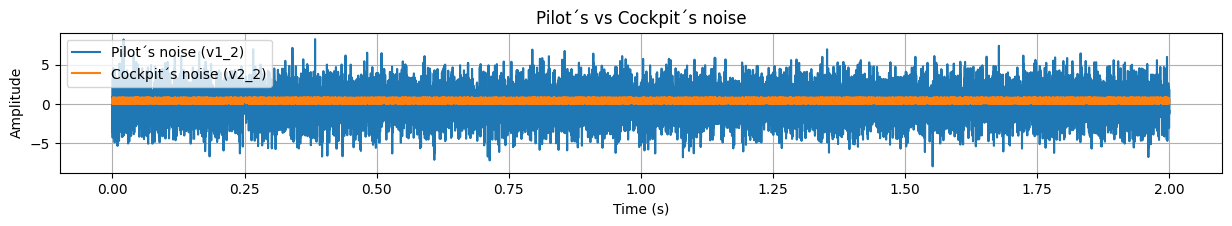

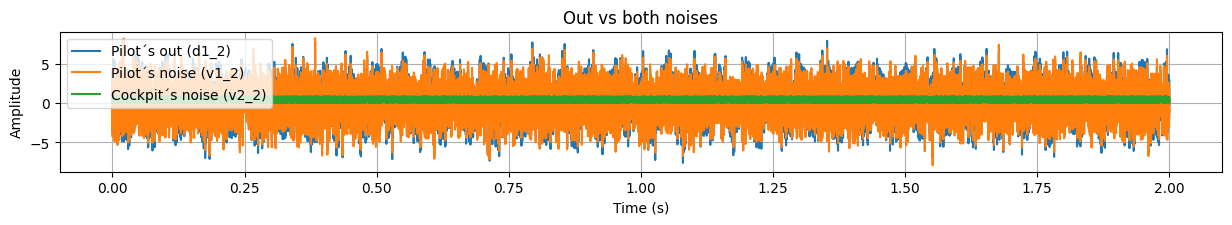

In [5]:
# YOUR CODE HERE
#<SOL>
v1_2=2*v
v2_2=np.sin(1/(1+np.exp(-2*v)))

d1_2=v1_2+ pilot

plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
plt.plot(n, v1_2, label='Pilot´s noise (v1_2)')
plt.plot(n, d1_2, label='Pilot´s out (d1_2)')
plt.title('Pilot´s  output vs noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(2,1,2)
plt.plot(n, v1_2, label='Pilot´s noise (v1_2)')
plt.plot(n, v2_2, label='Cockpit´s noise (v2_2)')

plt.title('Pilot´s vs Cockpit´s noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15,4))#Esta es la que se pide
plt.subplot(2,1,2)
plt.plot(n, d1_2, label='Pilot´s out (d1_2)')
plt.plot(n, v1_2, label='Pilot´s noise (v1_2)')
plt.plot(n, v2_2, label='Cockpit´s noise (v2_2)')
plt.title('Out vs both noises')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
#<\SOL>

## 1.4. Filters

Build a function called `my_matrices` that receives:
*  The input signal ($x[n]$ with a number of samples equal to $N$)
*  The output signal ($d[n]$ with a number of samples equal to $N$)
*  The order of the filter ($M$)

and returns a dataset ($\textbf{X}$, $D$) in the matrix format shown below:

$$X=\begin{bmatrix}
  x[M-1] & x[M-2] & ... & x[1] & x[0]\\
  x[M] & x[M-1] & ... & x[2] & x[1]\\
  x[M+1] & x[M] & ... & x[3] & x[2]\\
  ...&...  &...  &...  & ... \\
  %x[2M-1] & x[2M-2] & ... & x[M+1] & x[M]\\
x[N-1] & x[N-2] & ... & x[N-M+1] & x[N-M]\\
\end{bmatrix} \,\,\,\, D=\begin{bmatrix}
  d[M-1]\\
  d[M]\\  
  d[M+1]\\
  ... \\
  d[N-1]
  %d[2M-1]
\end{bmatrix}$$


$\underline{\text{Hint}}$: The function [toepliz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.toeplitz.html) included in the library `scipy.linalg` could be useful to calculate matrix $X$.


In [6]:
# YOUR CODE HERE
from scipy.linalg import toeplitz
def my_matrices(x, d, M):
 #<SOL>
 D=d[(M-1):]
 X=toeplitz(x)[M-1:,:M]

  #<\SOL>
 return X, D

> As an example, if we have:

$$x=[1, 2, 3, 4, 5, 6, 7, 8, 9,10]$$

$$d=[0, 1, 0, 1, 0, 1, 1, 1, 0, 0]$$

> and $M=5$, the output would be:

\begin{equation}
M= \begin{bmatrix}
5 & 4 & 3 & 2 & 1\\
6 & 5 & 4 & 3 & 2\\
7 & 6 & 5 & 4 & 3\\
8 & 7 & 6 & 5 & 4\\
9 & 8 & 7 & 6 & 5\\
10 & 9 & 8 & 7 & 6\\
\end{bmatrix}
\end{equation}

\begin{equation}
D= \begin{bmatrix}
0 & 1 & 1 & 1 & 0 & 0\\
\end{bmatrix}
\end{equation}


Try it yourself!!

$\underline{\text{Note}}$: Indexing in Python starts at $0$, which means that the first element in a sequence has an index of $0$, the second element has an index of $1$, and so on.

In [7]:
# YOUR CODE HERE
from numpy import transpose
#<SOL>
x=[1,2,3,4,5,6,7,8,9,10]
d=[0,1,0,1,0,1,1,1,0,0]
my_matrices(x,d, 5)
#<\SOL>

(array([[ 5,  4,  3,  2,  1],
        [ 6,  5,  4,  3,  2],
        [ 7,  6,  5,  4,  3],
        [ 8,  7,  6,  5,  4],
        [ 9,  8,  7,  6,  5],
        [10,  9,  8,  7,  6]]),
 [0, 1, 1, 1, 0, 0])

> How is the output filter computed/obtained?

  Next, it is shown the FIR filter (with order $M$) that obtains its output ($y[n]$) as a function of the $M$ last values of the input signal ($x[n]$):

$${y}[n] = \sum_{m=0}^{M-1}{w}[m]{x[n-m]}$$

This is equivalent to the linear model studied for regression tasks, where the output is obtained as a linear combination of input observations.


## 1.5. Compute the correlation between signals

### 1.5.1. Check correlations

One of the main premises of the noise-canceling Wiener filter relies on the assumption that the two noise components are correlated and the original signal (the pilot's voice) is incorrelated with both noise components. Let's analyse the correlation between signals to verify that we can apply this kind of filter to our problem.

### 1.5.2. Construct a function that computes the correlation of two signals
The first thing we need to do is to implement a new funtion that computes the correlation between two signals over a period of time.

How to calculate this correlation in the assignment?

$${r} =  \frac{1}{N_r}\textbf{X}^\top D  $$

where:

 *   $N_r$ is the number of samples to be used in the calculation of correlation.
 *   $\textbf{X}$ and $D$ are the output variables returned by the function `my_matrices`.

Build a function called `my_sample_correlation` that receives:
*  The first signal ($x[n]$)
*  The second signal ($d[n]$)
*  A positive constant ($M$)

and computes the correlation as previously stated. Please note that the length of the output vector should be equal to $M$.

$\underline{\text{Note}}$: The function `my_sample_correlation` should call the function `my_matrices`.


In [8]:
# YOUR CODE HERE

def my_sample_correlation(x, d, M):
  N = len(x)
  Nr = N-M+1
  x_aux,d_aux=my_matrices(x,d,M)
  rxd = np.matmul(x_aux.T,d_aux)/Nr

  #<SOL>

  #<\SOL>
  return rxd

### 1.5.3.  Plot the correlation in the first scenario

Use the previous function to obtain the correlation among the signals in the **first scenario** and plot them:

*   The pilot's voice and the noise in pilot's microphone
*   The pilot's voice and the noise in cockpit's microphone
*   The noise in pilot's microphone and the noise in cockpit's microphone.

Please, set a title to each plot or figure, indicating what each one represents.

$\underline{\text{Note}}$: To compute the correlation, let's assume $M=20$.




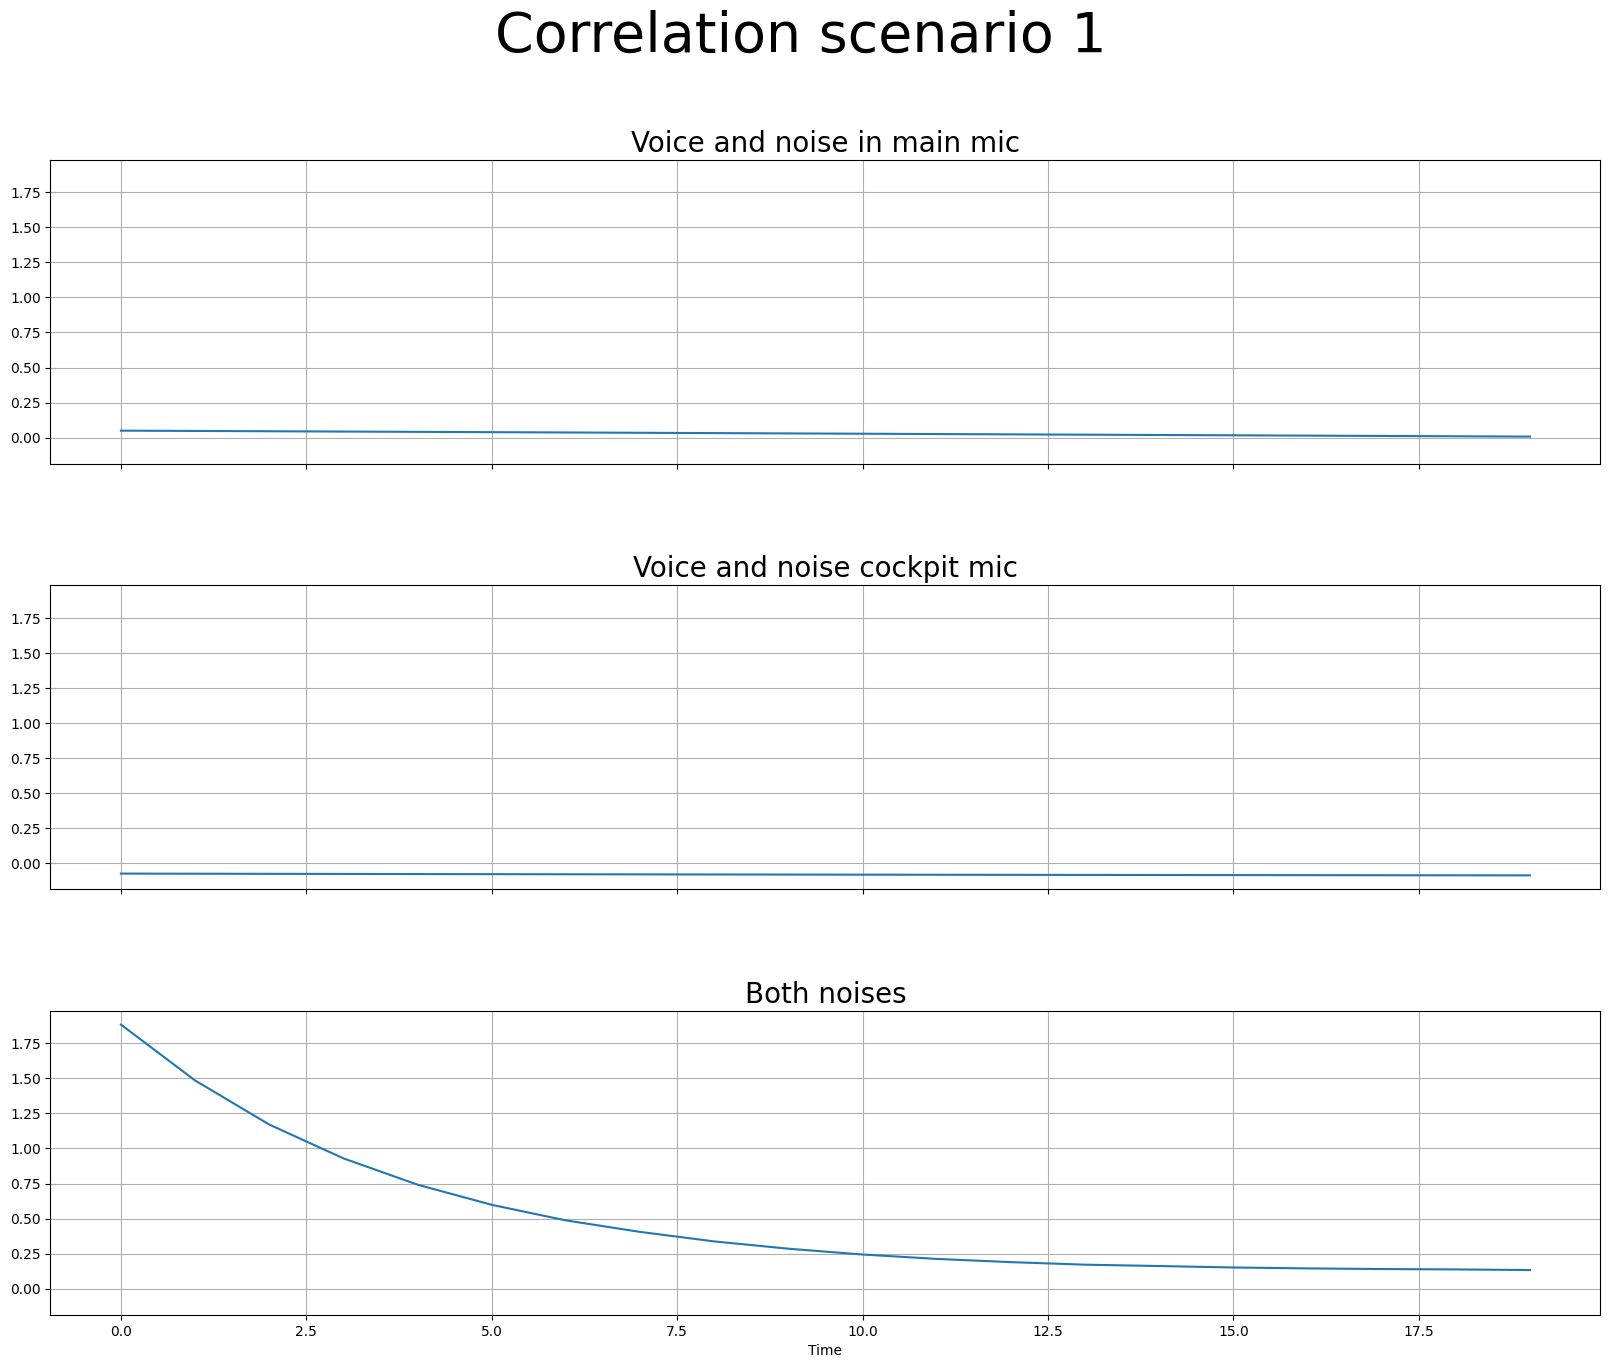

In [9]:
# YOUR CODE HERE
#<SOL>
a=my_sample_correlation(pilot,v1,M=20)
b=my_sample_correlation(pilot,v2,M=20)
c=my_sample_correlation(v1,v2,M=20)

fig, x = plt.subplots(3, sharex=True, figsize=(20,15), sharey=True)

plt.subplots_adjust(hspace=0.4)
fig.suptitle('Correlation scenario 1', fontsize = 40)


x[0].plot(a)
x[0].set_title('Voice and noise in main mic', fontsize = 20)
x[0].grid(True)

x[1].plot(b)
x[1].set_title('Voice and noise cockpit mic', fontsize = 20)
x[1].grid(True)

x[2].plot(c)
x[2].set_title('Both noises', fontsize = 20)
x[2].set_xlabel("Time")
x[2].grid(True)

fig.show()
#<\SOL>

###1.5.4. Plot the correlation in the second scenario

Now, obtain and plot the correlations for the **second scenario**:

*   The pilot's voice and the noise in pilot's microphone
*   The pilot's voice and the noise in cockpit's microphone
*   The noise in pilot's microphone and the noise in cockpit's microphone.

Please, set a title to each plot or figure, indicating what each one represents.

$\underline{\text{Note}}$: To compute the correlation, let's assume $M=20$.


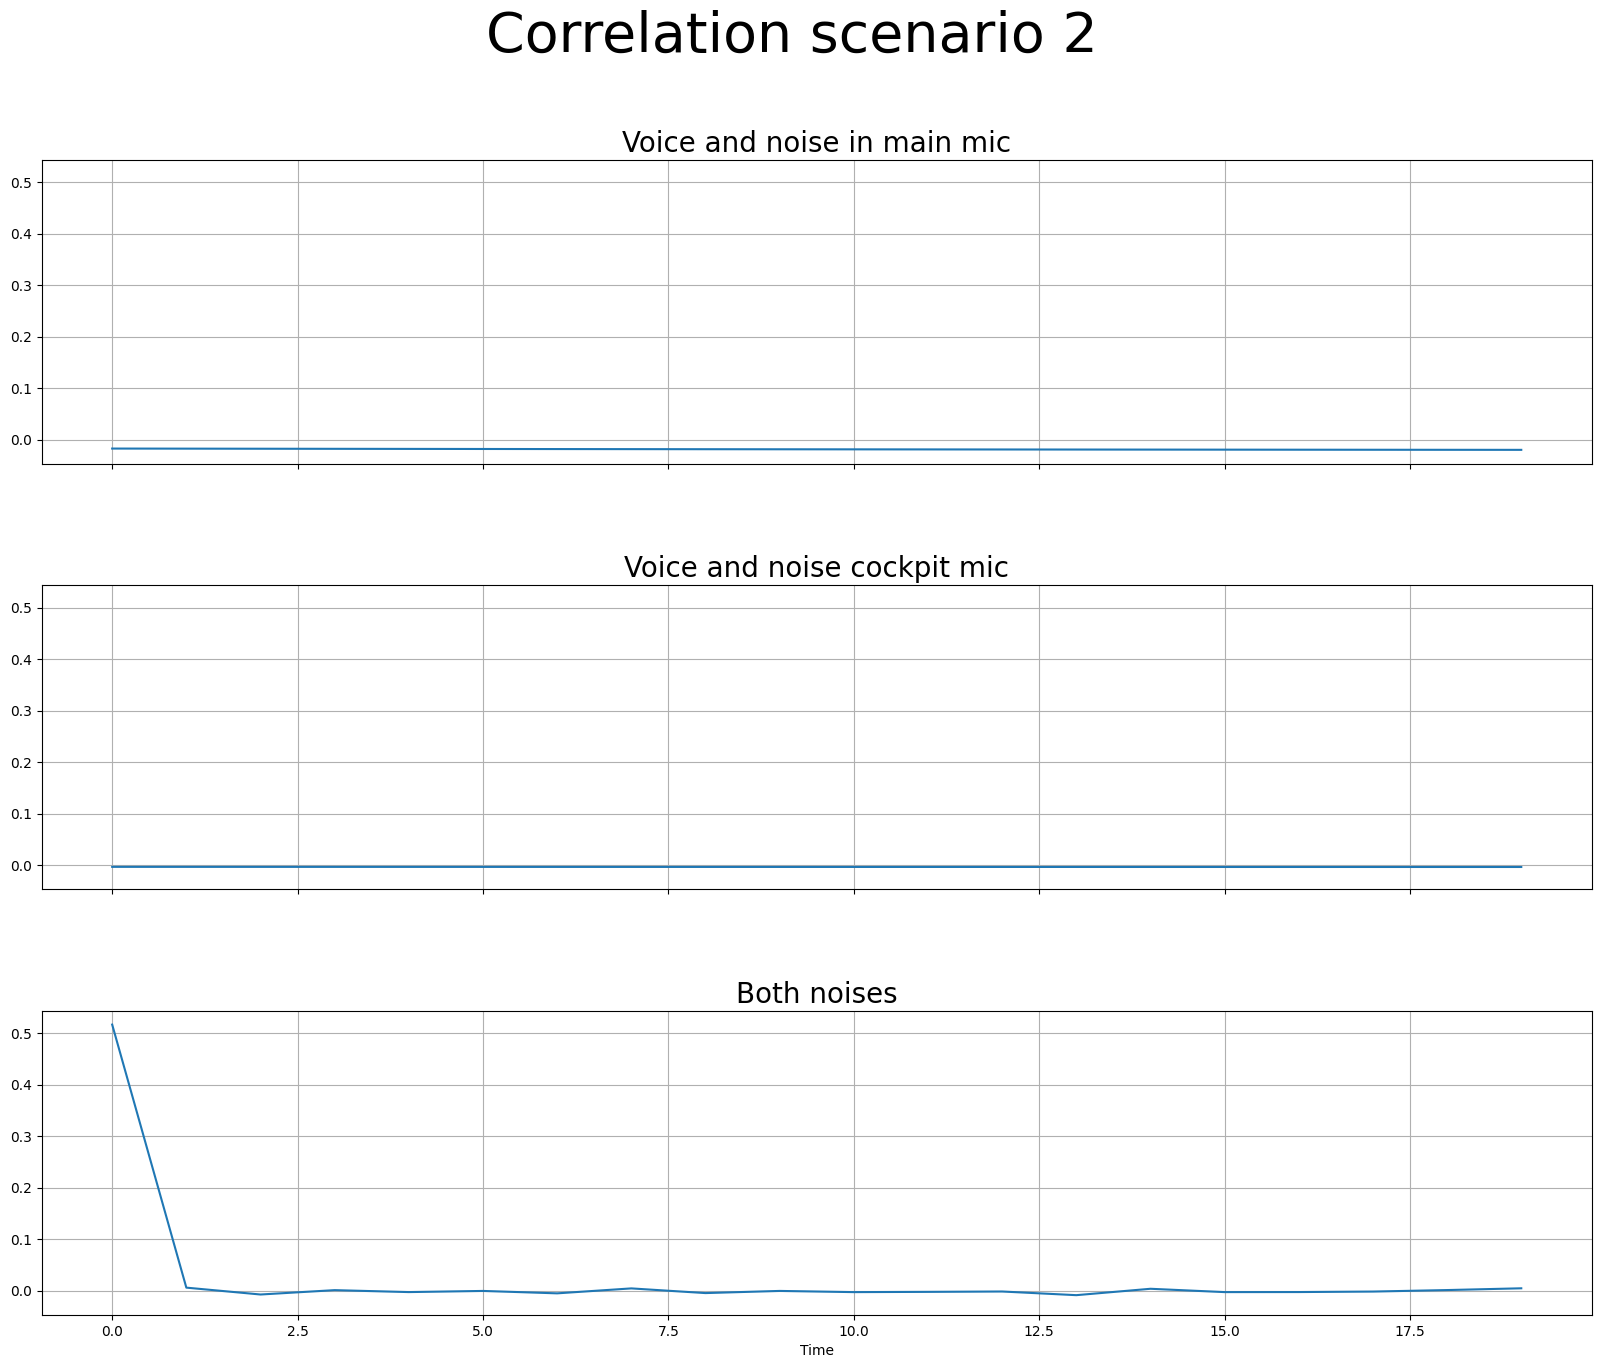

In [10]:
# YOUR CODE HERE
#<SOL>
a2=my_sample_correlation(pilot,v1_2,M=20)
b2=my_sample_correlation(pilot,v2_2,M=20)
c2=my_sample_correlation(v1_2,v2_2,M=20)

fig, x = plt.subplots(3, sharex=True, figsize=(20,15), sharey=True)
plt.subplots_adjust(hspace=0.4)
fig.suptitle('Correlation scenario 2', fontsize = 40)


x[0].plot(a2)
x[0].set_title('Voice and noise in main mic', fontsize = 20)
x[0].grid(True)

x[1].plot(b2)
x[1].set_title('Voice and noise cockpit mic', fontsize = 20)
x[1].grid(True)

x[2].plot(c2)
x[2].set_title('Both noises', fontsize = 20)
x[2].set_xlabel("Time")
x[2].grid(True)

fig.show()



#<\SOL>

In which scenario are the noise components more correlated? Does it make sense?

<font color = 'green'> YOUR ANSWER HERE


Están más correlacionadas en el primer escenario. Y tiene sentido porque en el primer escenario tienen la misma fórmula, pero diferentes varianzas, mientras que en el segundo escenario tienen fórmulas diferentes y, por lo tanto, su correlación es mucho menor.

Además podemos apreciar que la correlación es 0 en las señales que al principio nos habían dicho que eran incorreladas.

## 1.6. Implementation of the Wiener filter

We will now use a Wiener filter with the objective of reconstructing the original signal from the noisy ones.

### 1.6.1 Autocorrelation matrix
Extend `my_sample_correlation` function to also return the autocorrelation matrix of a signal $X$ ($\mathbf{R}_{XX}$) along with the correlation between $X$ and $D$ ($\mathbf{r}_{XD}$).

$$\mathbf{R}_{XX}=  \frac{1}{N_r}\mathbf{X}^T\mathbf{X}$$

$$\mathbf{r}_{XD} =  \frac{1}{N_r}\textbf{X}^\top D  $$

where:

 *   $N_r$ is the number of samples to be used in the calculation of correlation.
 *   $\textbf{X}$ and $D$ are the output variables returned by the function `my_matrices`.

Call the new function with the name `my_sample_correlation_wiener`. The input arguments to this function should be:
*  The input signal ($x[n]$ with a number of samples equal to $N$)
*  The output signal ($d[n]$ with a number of samples equal to $N$)
*  The order of the filter ($M$)


Please note that the function `my_sample_correlation_wiener`  should call the function `my_matrices`.

In [11]:
# YOUR CODE HERE
def my_sample_correlation_wiener(x, d, M):
  N = len(x)
  Nr = N-M+1
  #<SOL>
  rxd = my_sample_correlation(x, d, M)
  X, d = my_matrices(x, d, M)
  Rxx = 1./Nr * X.T.dot(X)

  return Rxx, rxd
  #<\SOL>

### 1.6.2 Obtain the coefficients of the Wiener filter

The coefficients of the Wiener filter can be obtained as the product of the inverse of the autocorrelation of a signal $X$ and the correlation vector among both signals $X$ and $D$:      

$$
\mathbf{w} = \mathbf{R}_{XX}^{-1}\mathbf{r}_{XD}
$$

where:    
*   $X$ is the input signal to the filter
*   $D$ is the reference signal

Implement a new function, called `wiener`, that computes the coefficients of the Wiener filter as shown previously.



In [12]:
# YOUR CODE HERE
def wiener(x, d, M):
  #<SOL>
  Rxx,rxd=my_sample_correlation_wiener(x, d, M)
  w =  np.linalg.inv(Rxx).dot(rxd)
  return w
  #<\SOL>

### 1.6.3 Obtain the coefficients of the Wiener filter

Calculate and print the weights obtained by the Wiener filter for each scenario using `M = 5`. In each scenario:

*   The input signal to the filter is $v_2[n]$.
*   The reference signal is $d[n]$.

Use the corresponding signal for each situation.






In [13]:
# YOUR CODE HERE
#<SOL>
weights_1 = wiener(v2,d1,5)
print("Case 1: ",weights_1)
weights_2 = wiener(v2_2,d1_2,5)
print("Case 2: ",weights_2)

#<\SOL>

Case 1:  [0.10178019 0.02190411 0.02266092 0.02066934 0.09810725]
Case 2:  [ 5.81462588 -1.32925316 -1.32209405 -1.35110573 -1.36278999]



Now, use the same data to fit a Linear Regression model with no bias. Use the class `LinearRegression` in `sklearn` with the parameter `fit_intercept`set to `False`. Please note that the matrix $X$ returned by the function `my_matrices`represents here the training data, whereas the vector $D$ denotes the target vector.

Show the weights obtained by the linear regressor.

In [14]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression

def weights_linear_model(x, d, M):
  #<SOL>
  x_lm, d_lm = my_matrices(x, d, M)
  w_lm = LinearRegression(fit_intercept = False).fit(x_lm, d_lm).coef_

  return w_lm

print("Weight calculations with linear model")
weights_lm_1 = weights_linear_model(v2,d1,5)
print("Case 1: ",weights_lm_1)
weights_lm_2 = weights_linear_model(v2_2,d1_2,5)
print("Case 2: ",weights_lm_2)




  #<\SOL>

Weight calculations with linear model
Case 1:  [0.10178019 0.02190411 0.02266092 0.02066934 0.09810725]
Case 2:  [ 5.81462588 -1.32925316 -1.32209405 -1.35110573 -1.36278999]


Compare the weights of the linear model with the ones obtained by the Wiener filter and discuss why the coefficients are equal.

<font color = 'green'> YOUR ANSWER HERE


El filtro de Wiener minimiza el error cuadrático, el error es la estimación de la voz del piloto.

Estima la componente de ruido 'v' de la señal en el micro del piloto 'd' a partir del ruido en el otro micro 'X'. La estimación de 'v' se calcula mediante unos pesos que se calcula de la sigiente manera:

$$
\mathbf{w} = \mathbf{R}_{XX}^{-1}\mathbf{r}_{XD}
$$

El regresor lineal también minimiza el error cuadratico medio de la estimacion que realiza. Si usamos el la matriz del ruido X como las observaciones y d como etiquetas a estimar, este estimador calculará la estimacion del ruido 'v' que tenga el menor error cuadratico medio.

Los pesos que usa este regresor, cuando no tenemos en cuenta el termino independiente, para su estimacion se calculan de la misma manera. Calculando matriz de autocorrelación de las observaciones y el vector de correlación de las etquetas 'd'd.

Por tanto estamos haciendo el mismos cálculo en ambos métodos y por eso salen igual.

### 1.6.4 Filter and evaluation

Obtain the output of the Wiener filter ($y[n]$) for the input signal ($x[n]$):

$${y}[n] = \widehat{v}_1[n]= \sum_{m=0}^{M-1}{w}[m]{x[n-m]}$$

How to implement this in the assignment? You can simplify the calculation by using this expression:

$$Y = \mathbf{X}\cdot \mathbf{w}$$

where:



*   $\mathbf{X}$ represents the matrix returned by the function `my_matrices`
*   $\mathbf{w}$ denotes the coefficients of the Wiener filter



Name this function `wiener_predict`.




In [15]:
# YOUR CODE HERE
def wiener_predict(w, x):
  #<SOL>
  M = len(w)
  N = len(x)
  Nr = N-M+1

  X, d = my_matrices(x, x, M)
  y = X.dot(w)

  return y
  #<\SOL>

After that, compute the error signal of the filter (please note that in this case this error signal is an approximation of the pilot's voice).

$$e[n]={d}[n]-{y}[n] \equiv \widehat{s}[n]$$

where $y[n] = \widehat{v}_1[n]$.

Name this function `wiener_error`.


$\underline{\text{Note}}$:
*    It is not possible to provide an output for the first $M-1$ samples of the input since the filter needs to know the value of the previous $M-1$ samples.
*    To obtain the error, it is necessary to correctly align the original signal and the error of the Wiener filter taking into account that you do not provide an output for the first $M-1$ samples.


In [16]:
# YOUR CODE HERE
def wiener_error(w, x, d):
  #<SOL>
  M = len(w)
  e = d[M-1:] - wiener_predict(w,x)
  return e

  #<\SOL>

## 1.7 Evaluation of both scenarios

Now, we are going to analyze the effect of using different values of $M$ in the both scenarios.

### 1.7.1 First scenario

For this purpose, we will explore different values of $M$. In particular, $M= 5, 10, 50, 100, 500, 1000, 2000$.

To do so:
*   Obtain the Wiener filter.
*   Obtain the error signal of the filter.
*   Finally, plot in the same figure both the pilot's voice and the error signal returned by the Wiener filter.

After a certain value of $M$, the error signal of the filter will be an approximation of the pilot's voice.





In [17]:
# YOUR CODE HERE
d_W_1 = {}
d_error_1 = {}
v_M = [5,10,50,100,500,1000,2000]

#<SOL>
for M in v_M:
  w1 = wiener(v2, d1, M)
  d_W_1[M] = w1
  d_error_1[M] = wiener_error(w1, v2, d1)

#<\SOL>


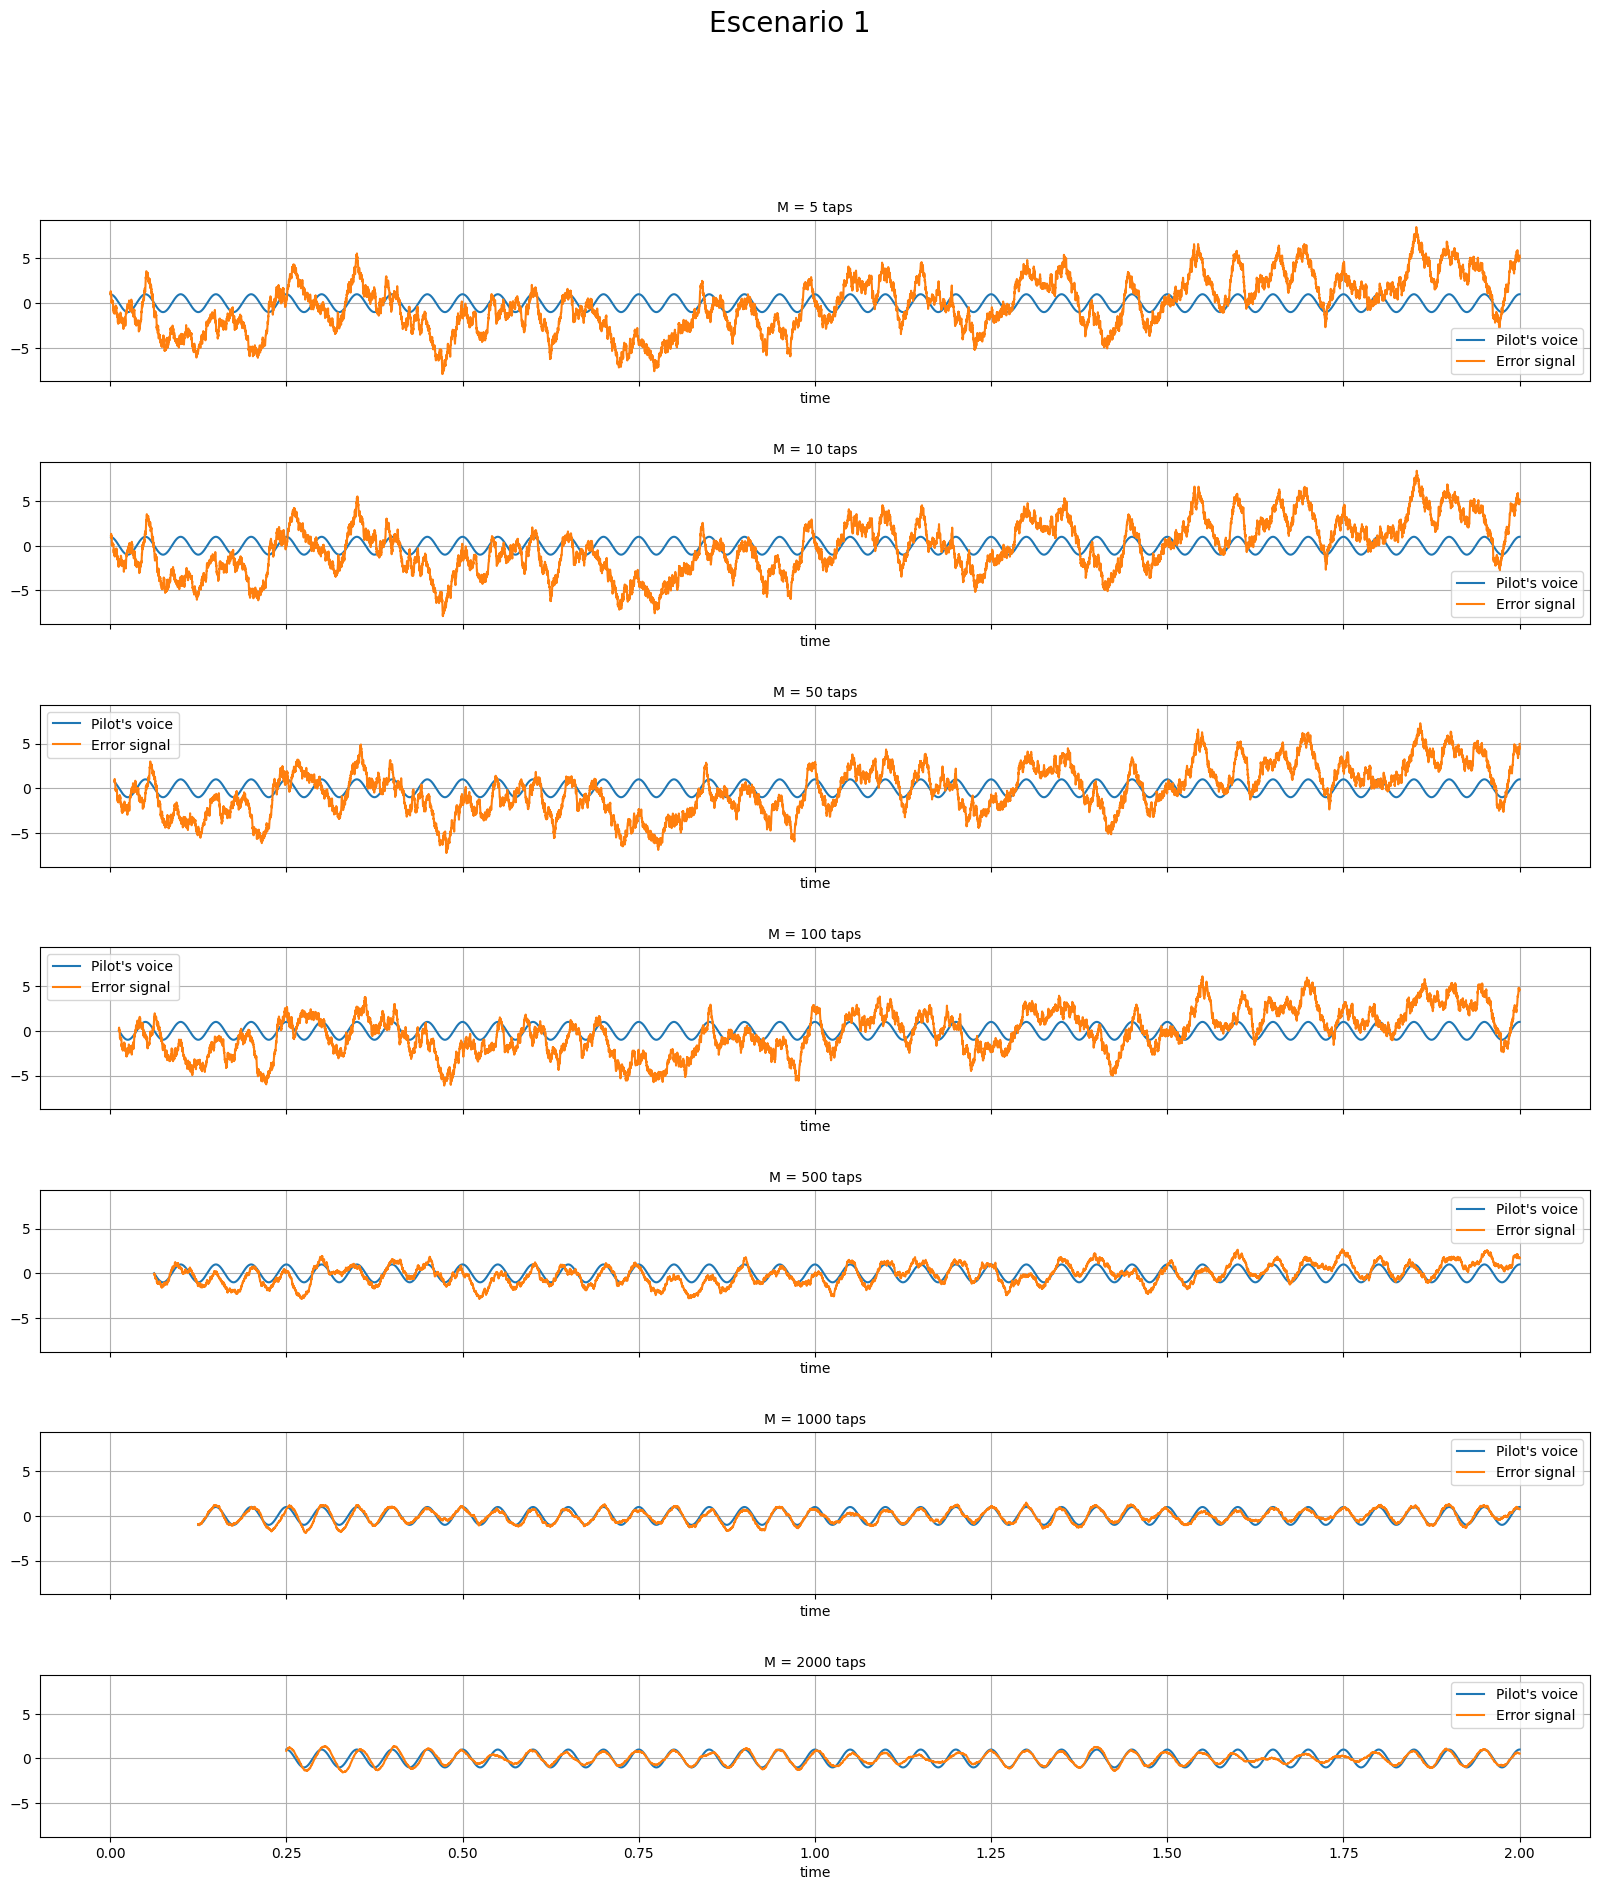

In [18]:
# YOUR CODE HERE
#<SOL>
fig, x = plt.subplots(len(v_M), figsize=(20, 3*len(v_M)), sharex = True, sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Escenario 1', fontsize = 20)

for i, M in enumerate(v_M):
  x[i].plot(n[M-1:],pilot[M-1:], label='Pilot\'s voice')
  x[i].plot(n[M-1:],d_error_1[M], label='Error signal')
  x[i].set_title('M = {} taps'.format(M), fontsize = 10)
  x[i].legend()
  x[i].set_xlabel('time')
  x[i].grid(True)
fig.show()

#<\SOL>

What is the most appropriate value of $M$? Would you explore greater values of $M$?

<font color = 'green'> YOUR ANSWER HERE

El valor más apropiado sería 1000 o 2000, ya que ambas recuperan la voz del piloto con una calidad aceptable. Vista la poca mejora que hay entre 1000 y 2000, nos quedaríamos con 1000 ya que nos da un resultado similar.

Dicho esto, no haría falta explorar más valores ya que la calidad señal obtenida es suficiente.




### 1.7.2. Evaluation second scenario

Now, let us analyze the effect of $M$ in the **second scenario**. As in the first scenario, the values of $M$ that will be explored are: $M= 5, 10, 50, 100, 500, 1000, 2000$.

To do so:
*   Obtain the Wiener filter.
*   Obtain the error signal of the filter.
*   Finally, plot in the same figure, both pilot's voice and the error signal returned by the Wiener filter.


In [19]:
# YOUR CODE HERE
d_W_2 = {}
d_error_2 = {}
v_M = [5,10,50,100,500,1000,2000]

#<SOL>
for M in v_M:
  w2 = wiener(v2_2, d1_2, M)
  d_W_2[M] = w2
  d_error_2[M] = wiener_error(w2, v2_2, d1_2)
#<\SOL>

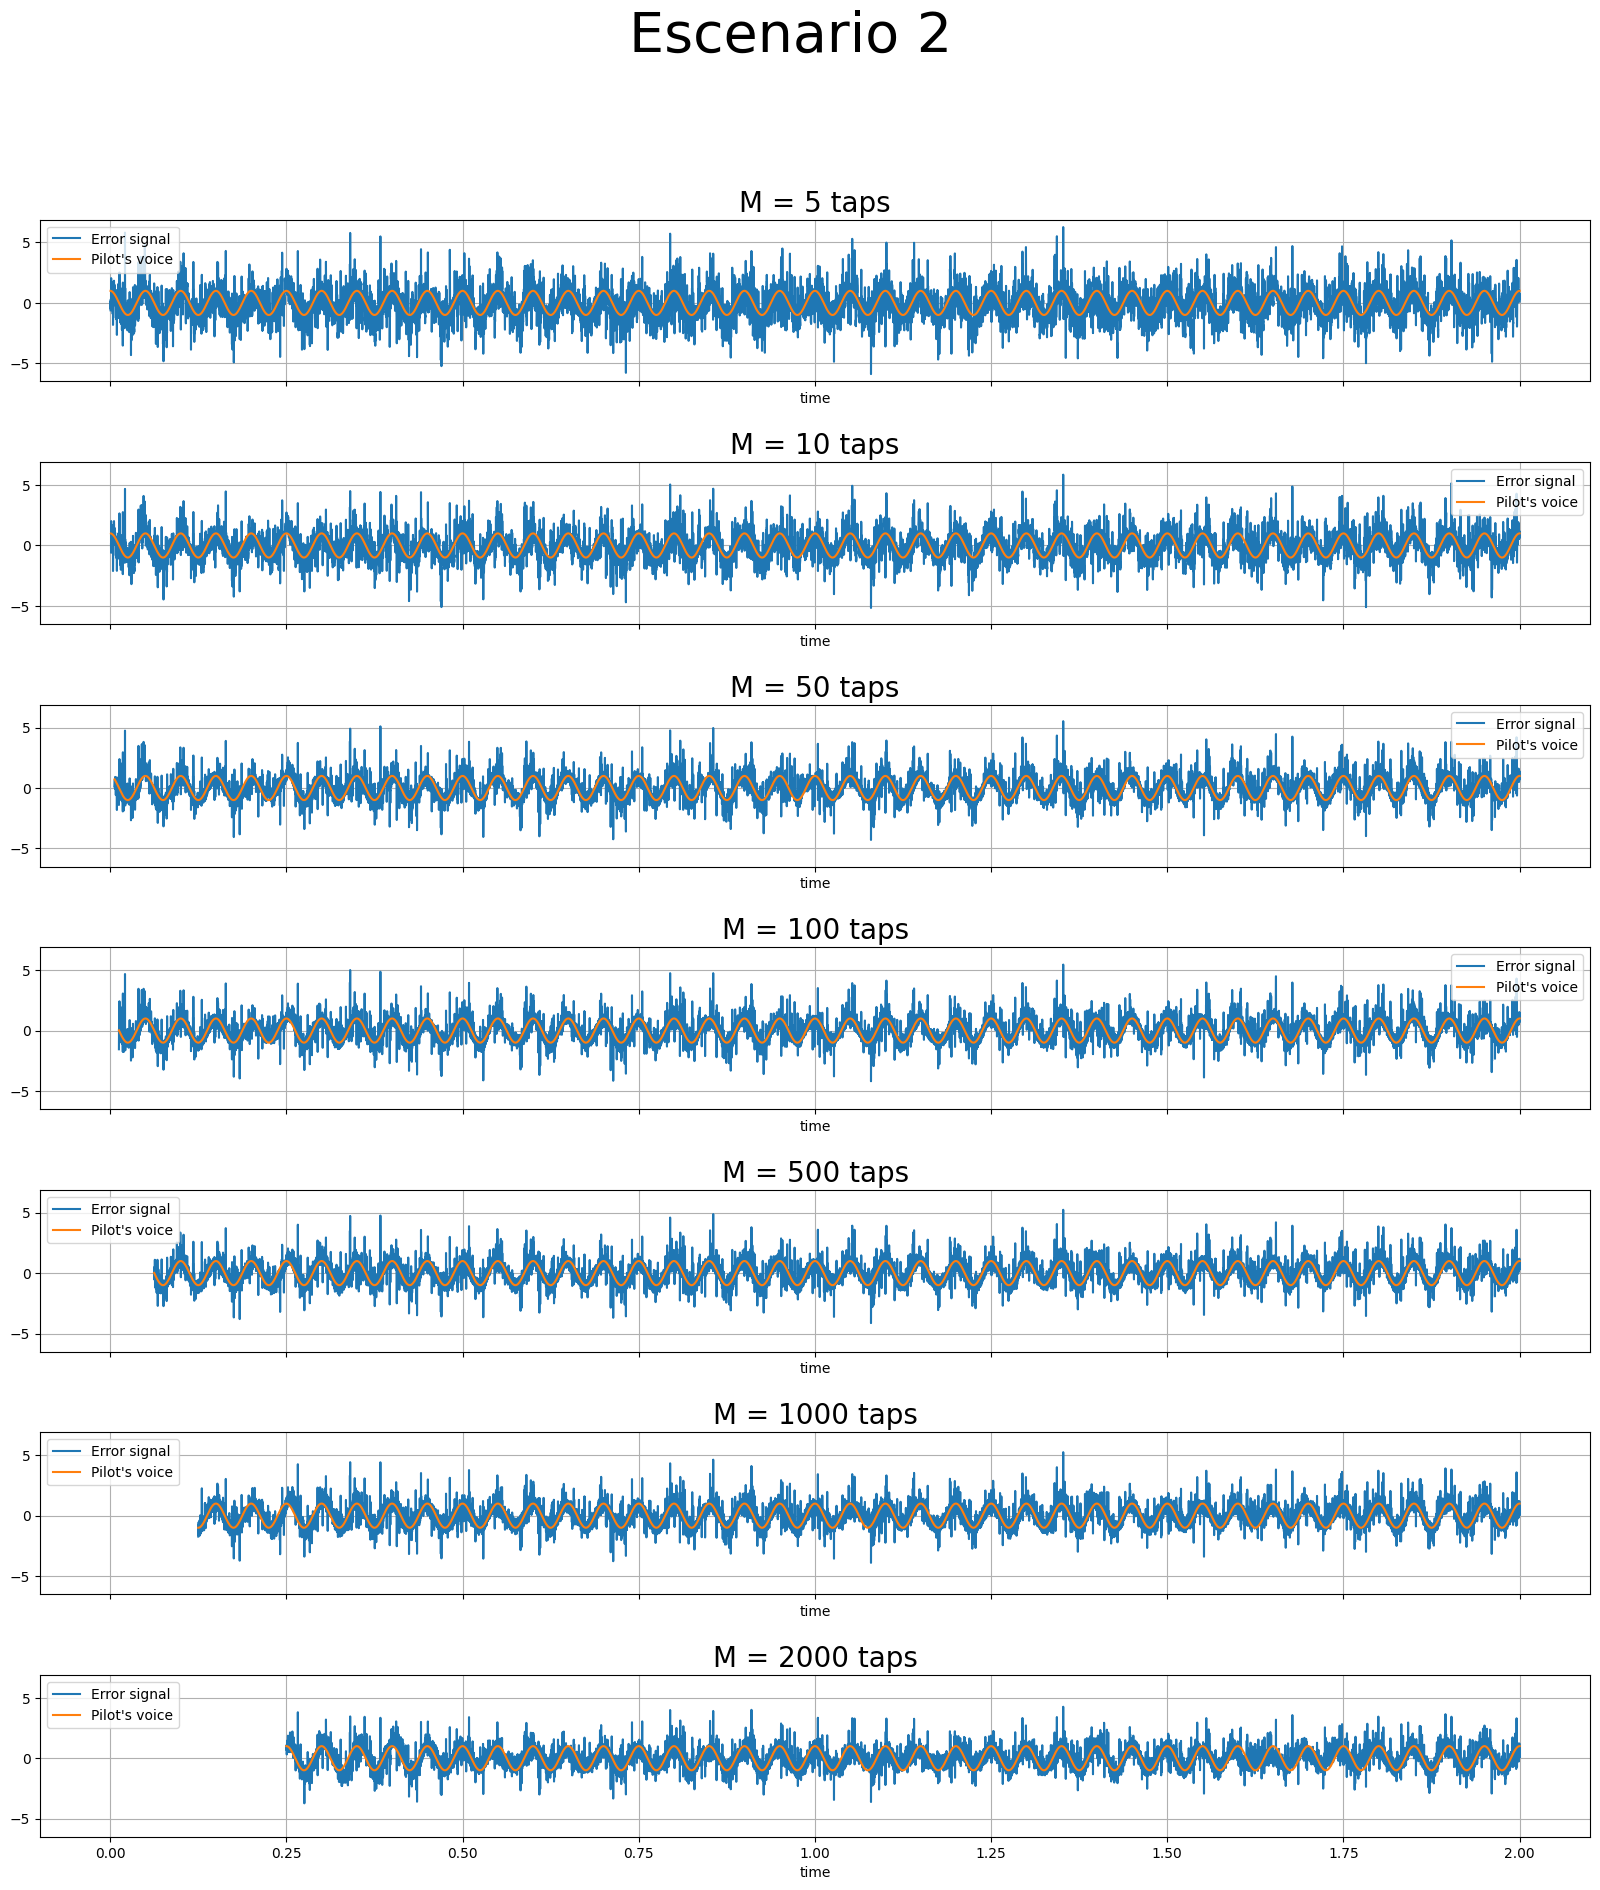

In [20]:
# YOUR CODE HERE
#<SOL>
fig, x = plt.subplots(len(v_M), figsize=(20, 3*len(v_M)), sharex = True, sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Escenario 2', fontsize = 40)

for i, M in enumerate(v_M):
  x[i].plot(n[M-1:],d_error_2[M], label='Error signal')
  x[i].plot(n[M-1:],pilot[M-1:], label='Pilot\'s voice')
  x[i].set_title('M = {} taps'.format(M), fontsize = 20)
  x[i].legend()
  x[i].set_xlabel('time')
  x[i].grid(True)

fig.show()

#<\SOL>

Among the values of explored of $M$, is there any value for which the error signal of the filter is an approximation of the pilot's voice? Do you think a greater value of $M$ will achieve a better approximation?

<font color = 'green'> YOUR ANSWER HERE

En este caso, el valor óptimo de los que hemos probado sería 5 ya que devuelve la señal de forma casi perfecta, y dada la calidad de la respuesta, no exploraríamos más valores.

### 1.7.3. Mean Square Error

Compute the mean square error as a function of $M$. To this end, for both scenarios, plot (in the same figure) the mean square error between the filter error and the original signal as a function of $M$.

Note that the filter error is computed as follows:

$$\widehat{s}[n]={d}[n]-{y}[n] = s[n] + v_1[n] -  \widehat{v}_1[n]$$

Bearing this in mind, the difference between the filter error and the original pilot's voice will be:
$$\widehat{s}[n]-s[n]=s[n] + v_1[n] -  \widehat{v}_1[n] - s[n] = v_1[n] -  \widehat{v}_1[n]  $$

$\underline{\text{Note}}$: Use a logarithmic scale range for the plots.



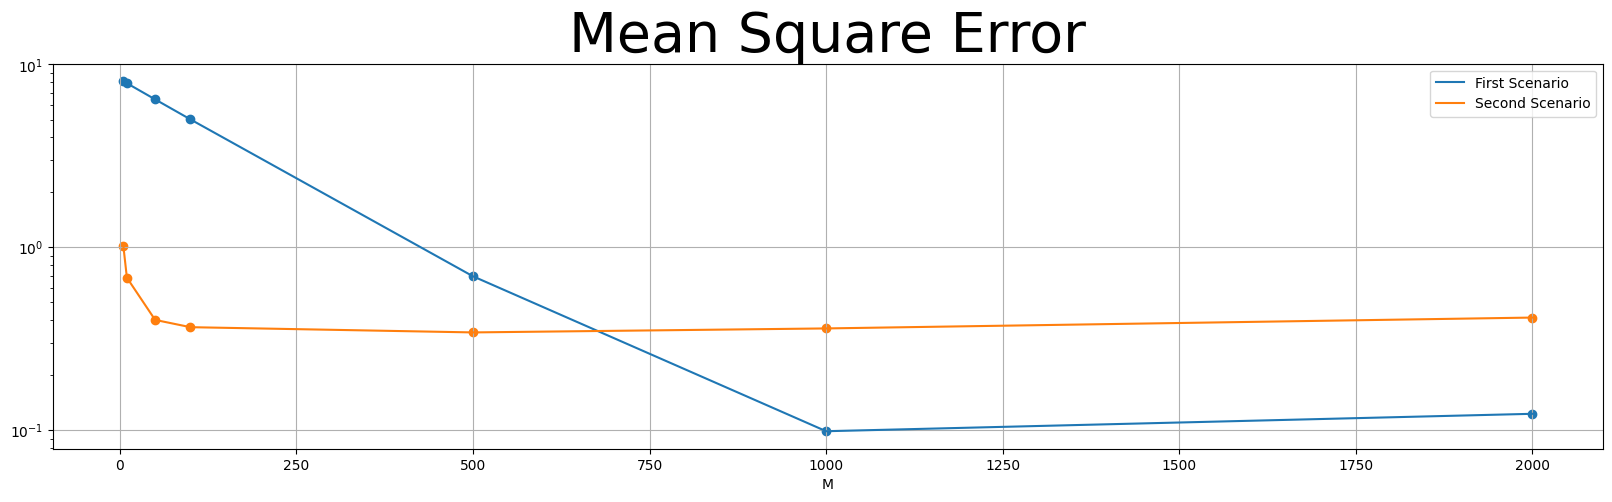

In [21]:
# YOUR CODE HERE
#<SOL>
mse1=np.empty(len(v_M))
mse2=np.empty(len(v_M))

for im,M in enumerate(v_M):
  mse2[im]= np.mean((d_error_2[M] - pilot[M-1:])**2)
  mse1[im]= np.mean((d_error_1[M] - pilot[M-1:])**2)

plt.figure(figsize=(20,5))

plt.plot(v_M,mse1,label='First Scenario')
plt.plot(v_M,mse2,label='Second Scenario')

plt.scatter(v_M, mse1)
plt.scatter(v_M, mse2)


plt.title('Mean Square Error', fontsize = 40)
plt.xlabel('M')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

#<\SOL>

Does the difference between the two scenarios make sense? Is it representative of your response in sections 1.7.1 and 1.7.2?

<font color = 'green'> YOUR ANSWER HERE

Sí, tiene sentido porque en el segundo caso el error es muy bajo (se ajusta bien a la señal del piloto) desde que M tiene valores pequeños (5) y va empeorando un poco según aumenta, mientras que en el caso 1 el error es muy grande para una M baja (se ajusta muy mal a la señal de piloto) y termina siendo mucho menor cuando la M tiene un gran tamaño (1000-2000).

## 1.8 With a listenable tone

Repeat the above but changing the **pilot's voice frequency** to **600Hz**. You don't need to generate the plots.

This can be listened!


### 1.8.1 Pilot's voice without noise

Reproduce the pilot's voice without noise (the original one). Please note that the frequency sampling is still 8000 Hz.

In [22]:
# YOUR CODE HERE
#<SOL>
f_2 = 600
pilot_2 = np.sin(2*np.pi*f_2*n)

Audio(pilot_2, rate=fs)

#<\SOL>

### 1.8.2 First scenario

Reproduce the pilot's mic sound for the **first scenario**.

In [23]:
# YOUR CODE HERE
#<SOL>
d1_800 = v1 + pilot_2
Audio(d1_800, rate=fs)
#<\SOL>

Reproduce the reconstructed signal for the **first scenario** and $M=1000$.

In [24]:
# YOUR CODE HERE
#<SOL>
M = 1000
wa = wiener(v2, d1_800, M)
error_1 = wiener_error(wa, v2, d1_800)
Audio(error_1, rate=fs)
#<\SOL>

Write the reconstructed signal for the first scenario (with $M=1000$) in a WAV file and **upload to Aula Global** along with the notebook solution.

*Hint*: You may want to use function [write](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html).

In [36]:
# YOUR CODE HERE
#<SOL>
from scipy.io.wavfile import write

write("filtrado_caso_1.wav", fs, error_1.astype(np.float32))
#<\SOL>

### 1.8.3 Second scenario

Now, reproduce the pilot's mic sound for the **second scenario**.

In [26]:
# YOUR CODE HERE
#<SOL>
d2_800 = v1_2 + pilot_2
Audio(d1_800, rate=fs)

#<\SOL>

Reproduce the reconstructed signal for the **second scenario** and $M=1000$.

In [27]:
# YOUR CODE HERE
#<SOL>
M = 1000
wa = wiener(v2_2, d2_800, M)
error_2 = wiener_error(wa, v2_2, d2_800)
Audio(error_2, rate=fs)

#<\SOL>

Write the reconstructed signal for the
second scenario (with $M$=1000) in a WAV file and **upload to Aula Global** along with the notebook solution.

In [28]:
# YOUR CODE HERE
#<SOL>
write("filtrado_caso_2.wav", fs, error_2.astype(np.float32))
#<\SOL>

# **2. Adaptive filtering**

## 2.1 Introduction

The LMS (Least-Mean-Squares) algorithm uses the estimates of the gradient vector from the available data. LMS incorporates an iterative procedure that makes successive corrections to the weight vector in the direction of the negative of the gradient vector which eventually leads to the minimum average instant power.

The weight update equation is:
$$\mathbf{w}[n+1] = \mathbf{w}[n] + \mu \mathbb{E}\{e[n]\mathbf{x}[n]\}$$

where $\mu$ is the step size (adaptation constant). That means we have found a sequential update algorithm which minimizes the cost function. Unfortunately, this algorithm is not realizable until we know $\mathbb{E}\{e[n]\mathbf{x}[n]\}$.

Generally, the expectation shown above is not computed. Instead, to run the LMS in an online (updating after each new sample is received) environment, we use an instantaneous estimate of that expectation. This can be done with the following unbiased estimator:

$$\mathbb{E}\{e[n]\mathbf{x}[n]\} \approx \frac{1}{L} \sum_{l=0}^{L-1} e[n-l]\mathbf{x}[n-l] $$

where $L$ indicates the number of samples we use for that estimate. The simplest case is $L=1$.

$$\mathbb{E}\{e[n]x[n]\} = e[n]\mathbf{x}[n] $$

For that simple case the update algorithm follows as:

$$\mathbf{w}[n+1] = \mathbf{w}[n] + \mu e[n]\mathbf{x}[n]$$

Indeed, this constitutes the update algorithm for the **LMS filter**.



## 2.2 Practical implementation

Write a function (`myLMS`) that implements the process of the adaptive filter. For this purpose, let's assume that the input signal is $X$, the reference (or desired) signal is $D$, the step size is $\mu$ and the order of the filter is $L$. Please, do not forget to compute the error signal (that is, the diference between $d[n]$ and $\widehat{d}[n]$, where $\widehat{d}[n] = \mathbf{w}^\intercal[n]\mathbf{x}[n]$).

In [29]:
# YOUR CODE HERE
def myLMS(x, d, mu, L):
  N = len(x)
  Nr = N - L + 1
  w = np.zeros(L)
  Salida = np.empty(Nr)
  Error = np.empty(Nr)
  L_w = np.empty((Nr, L))

  #<SOL>
  for n in range(L,N):
    VectorX = x[n-L:n]
    Salida[n-L] = VectorX.dot(w)
    Error[n-L] = d[n-1] - Salida[n-L]
    w = w + mu * Error[n-L] * VectorX
    L_w[n-L,:] = w.copy()
  #<\SOL>
  return Salida, Error, L_w


### 2.2.1 First scenario

Once the adaptive filter has been implemented, try the **first scenario** (Section 2.3.1). Let's assume again a frequency equal to $20$ Hz and a number of taps equal to $500$ ($L = 500$).

Find a value of $\mu$ that works more or less nicely. Since $\mu$ must fulfill the following condition:

$$0<\mu<\frac{2}{L \mathbb{E}\{x[n]^2\}}$$

create an array with $10$ values of $\mu$ ranging from $0$ to $\displaystyle \frac{2}{L \mathbb{E}\{x[n]^2\}}$ and obtain the optimal value of $\mu$ in terms of mean square error.


In [30]:
# YOUR CODE HERE
#<SOL>
L = 500

mu_max = 2./(L*np.mean(np.power(v2,2)))

mu = np.linspace(0,mu_max, 10)
mse1 = []
Error1 = {}

for i, m in enumerate(mu):

  Salida1, Error1[m], L_w1 = myLMS(v2, d1, m, L)
  mse1.append(np.mean((Error1[m] - pilot[L-1:])**2))

min_mse1 = mse1.index(np.min(mse1))
#<\SOL>

Plot the mean square error obtained as a function of the explored values of $\mu$.

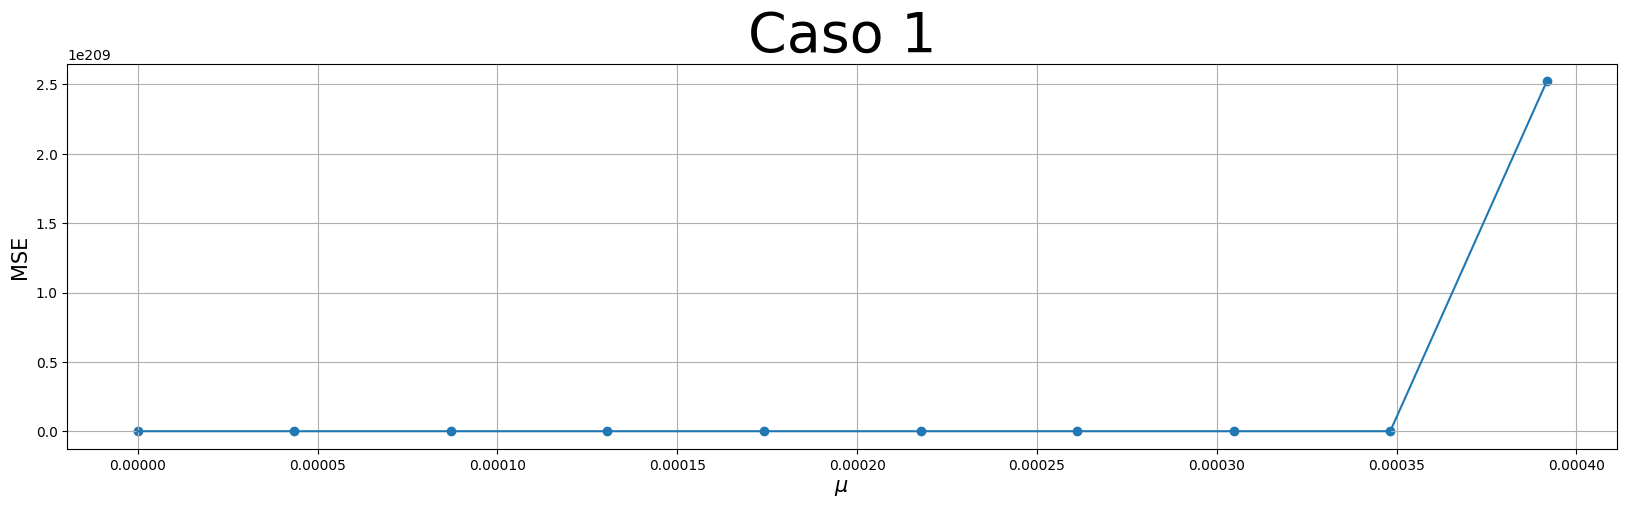

In [31]:
# YOUR CODE HERE
#<SOL>
plt.figure(figsize = (20,5))
plt.title('Caso 1', fontsize = 40)
plt.ylabel('MSE', fontsize = 15)
plt.xlabel('$\mu$ ', fontsize=15)
plt.plot(mu, mse1)
plt.scatter(mu, mse1)

plt.grid(True)
plt.show()
#<\SOL>

Plot, in the same figure, both pilot's voice and the error signal returned by the LMS algorithm for **first scenario** using the best $\mu$ value.

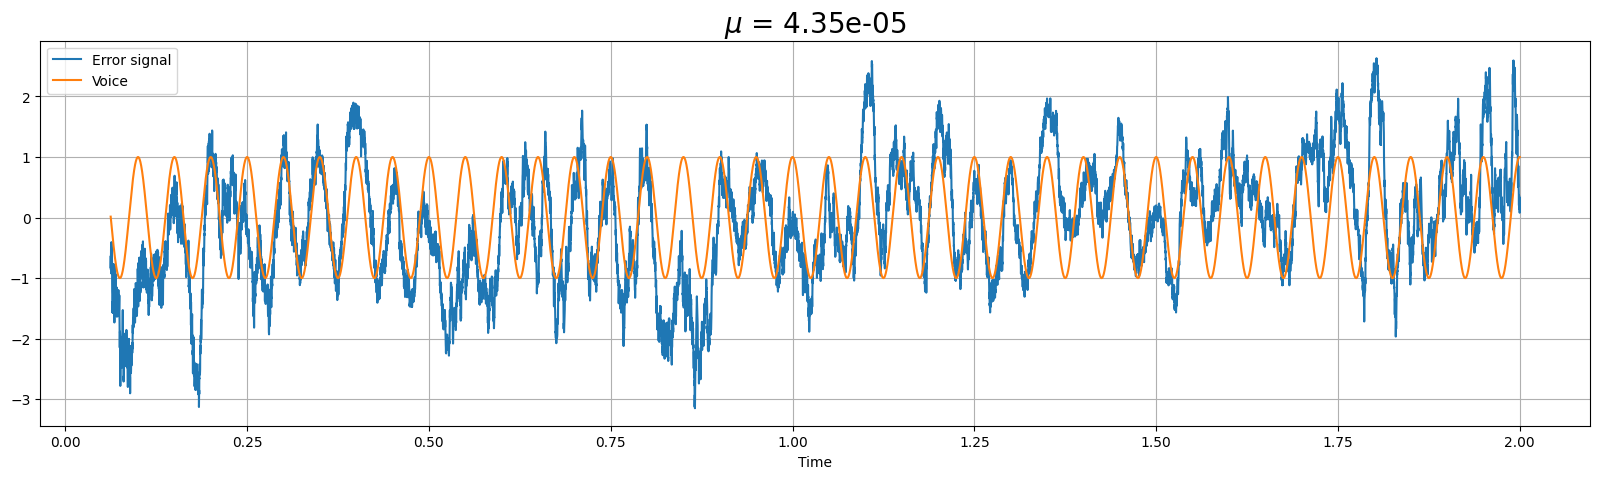

In [32]:
# YOUR CODE HERE
#<SOL>
plt.figure(figsize = (20,5))
plt.grid(True)
plt.title('$\mu$ = {}'.format(np.round(mu[min_mse1],7)), fontsize = 20)
plt.plot(n[L-1:], Error1[mu[min_mse1]], label = 'Error signal')
plt.plot(n[L-1:], pilot[L-1:], label = 'Voice')
plt.xlabel('Time')
plt.legend()
plt.show()
#<\SOL>

### 2.2.2 Second scenario

Now, try the **second scenario** (Section 2.3.2). Consider a number of taps equal to $100$ ($L = 100$) for this scenario.

Aiming at finde a value of $\mu$ that works more or less nicely, create an array with $10$ values of $\mu$ ranging from $0$ to $\displaystyle \frac{2}{L \mathbb{E}\{x[n]^2\}}$ and obtain the optimal value of $\mu$ in terms of mean square error.


In [33]:
# YOUR CODE HERE
#<SOL>
L = 100
mu_max = 2./(L*np.mean(np.power(v2_2,2)))
mu2 = np.linspace(0, mu_max, 10)
mse2 = []
Error2 = {}

for i, m in enumerate(mu2):

  Salida2, Error2[m], L_w2 = myLMS(v2_2, d1_2, m, L)
  mse2.append(np.mean((Error2[m]-pilot[L-1:])**2))

min_mse2 = mse2.index(np.min(mse2))
#<\SOL>

Plot the mean square error obtained as a function of the explored values of $\mu$.

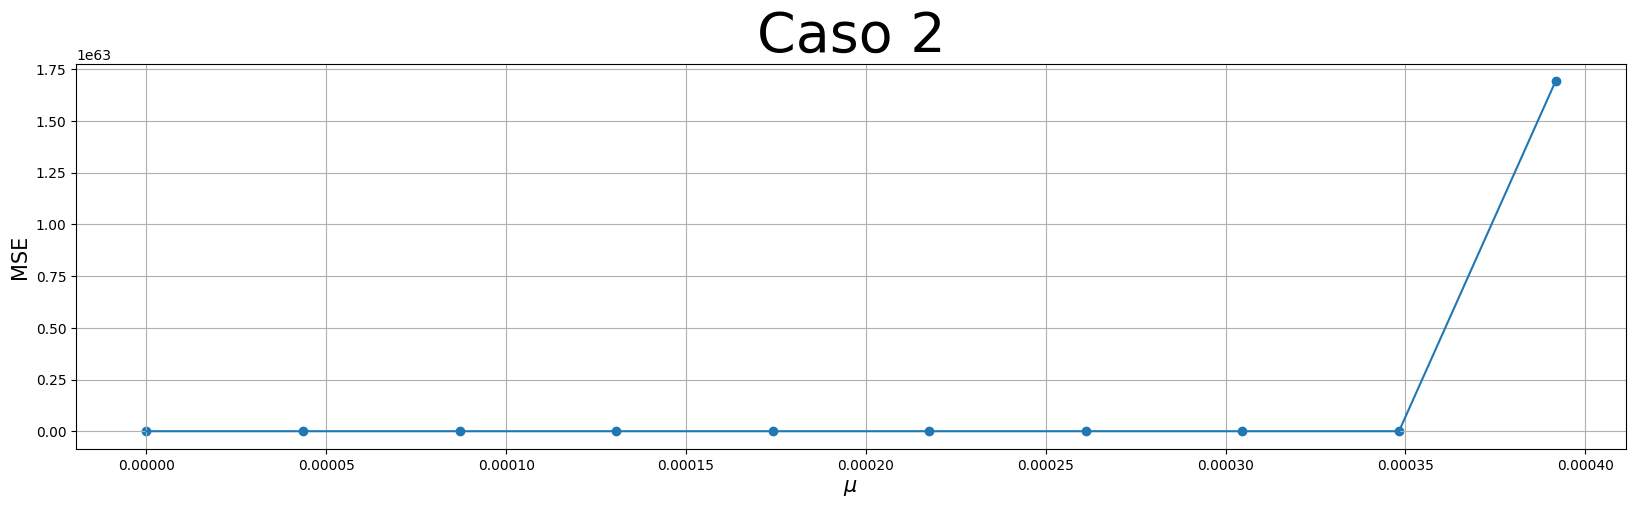

In [34]:
# YOUR CODE HERE
#<SOL>
plt.figure(figsize = (20,5))
plt.title('Caso 2', fontsize = 40)
plt.ylabel('MSE', fontsize = 15)
plt.xlabel('$\mu$ ', fontsize=15)
plt.plot(mu, mse2)
plt.scatter(mu, mse2)
plt.grid(True)
plt.show()


#<\SOL>

Finally, plot in the same figure, both pilot's voice and the error signal returned by the LMS algorithm for the **second scenario**.

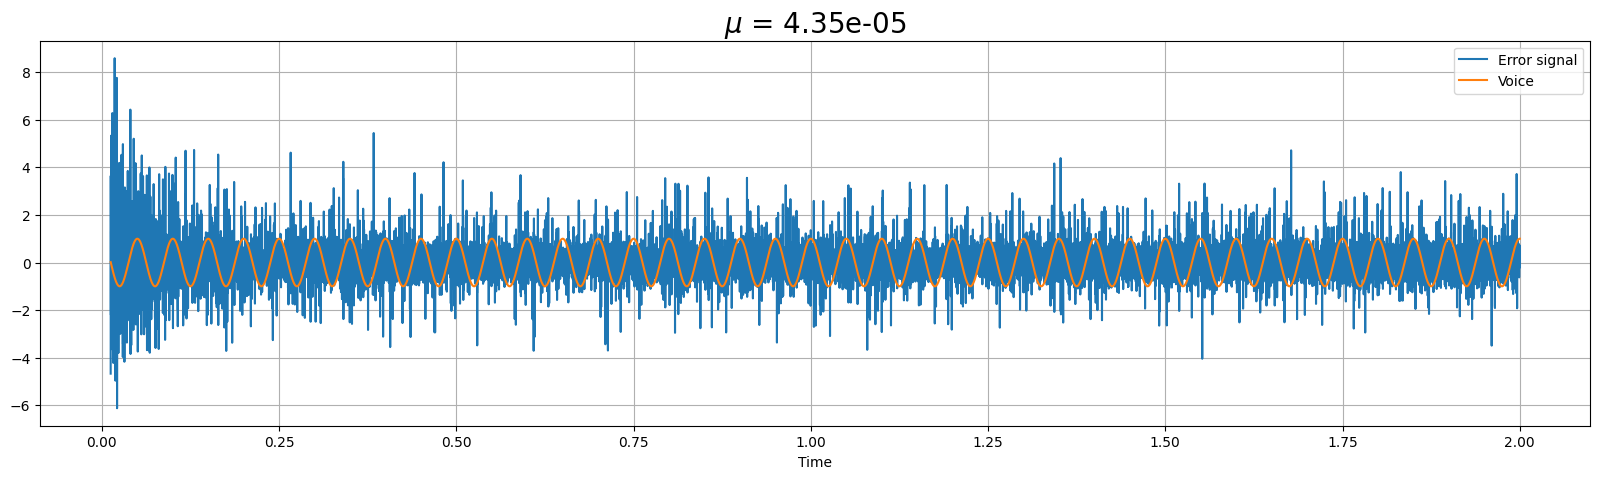

In [35]:
# YOUR CODE HERE
#<SOL>
plt.figure(figsize = (20,5))
plt.grid(True)
plt.title('$\mu$ = {}'.format(np.round(mu[min_mse1],7)), fontsize = 20)
plt.plot(n[L-1:], Error2[mu2[min_mse2]], label = 'Error signal')
plt.plot(n[L-1:], pilot[L-1:], label = 'Voice')
plt.xlabel('Time')
plt.legend()
plt.show()

#<\SOL>